In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge


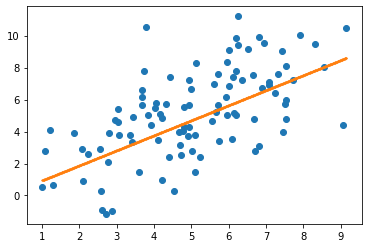

In [2]:
# データ生成デモ Gauss
X_mean = 5
X_var = 2
rng = np.random.default_rng()
X = rng.normal(loc=X_mean,size=100,scale=X_var)
Y = noise.Gauss(sigma=2.2,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(X.min(),X.max(),1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

plt.show()



In [3]:
# d = 1 、E ~ 正規分布
trial_num = 100 #試行回数
result_gauss = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_gauss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

X_test = rng.normal(loc=X_mean,size=10000,scale=X_var)
E_test = noise.Gauss(sigma=2.2,dim=X_test.shape[0],n=1).generate()
Y_test = E_test + X_test

for _ in tqdm(range(trial_num)):
    w_per_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    a = 0.01 # 学習率
    c = 5 # wの初期値がとりうる範囲
    n = 250 # データセットのサンプル数
    b = 2.2 # ノイズの分散
    # 初期値wの決定
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []



        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])

        tmp = merge.smallball(model_store)
        w_per_trial.append(tmp)
        loss_store.append(np.mean(son.f(y=Y_test,x=X_test,w=tmp))- np.mean(0.5*(E_test**2)))

    result_gauss.append(np.array(w_per_trial))
    result_loss_gauss.append(np.array(loss_store))

result_gauss = np.array(result_gauss)
result_loss_gauss = np.array(result_loss_gauss)





  0%|          | 0/100 [00:00<?, ?it/s]

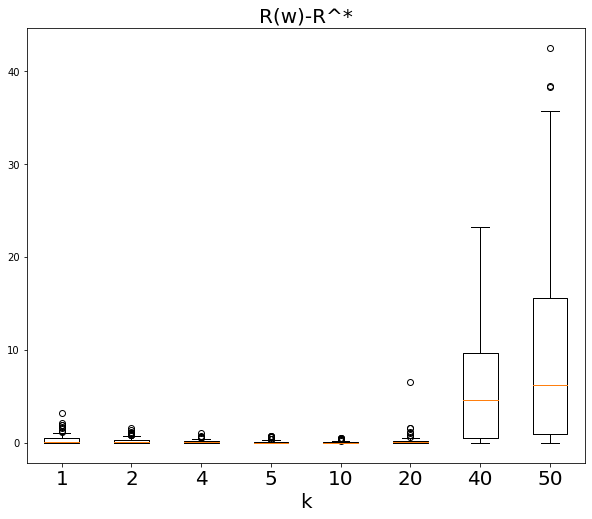

In [4]:
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [14]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19,39,49]],columns=columns)
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.367230,0.262926,0.150879,0.133227,0.089873,0.256529,5.917206,9.791329
std,0.549677,0.327604,0.196628,0.177729,0.123982,0.700745,6.009604,10.624516
min,0.000035,0.000505,-0.000011,-0.000010,0.000128,0.000021,-0.000019,0.001231
25%,0.046749,0.049227,0.015348,0.016891,0.010821,0.020405,0.551947,0.947889
50%,0.154030,0.141601,0.073956,0.055341,0.045018,0.082672,4.666620,6.236694
75%,0.489112,0.326736,0.202604,0.164836,0.110927,0.248325,9.699735,15.594937
max,3.253281,1.577953,1.112987,0.791278,0.595035,6.537571,23.211736,42.549863


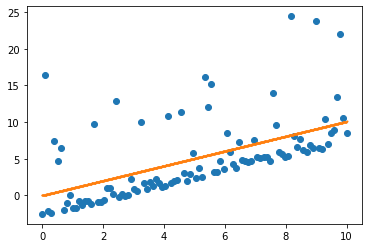

In [15]:
# データ生成デモ Log-normal
X = np.linspace(0,10,100)
np.random.shuffle(X)
Y = noise.LogNormal(sigma=1.75,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)



In [16]:
trial_num = 100 #試行回数
result_lognormal = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_lognormal = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

X_test = rng.normal(loc=X_mean,size=10000,scale=X_var)
E_test = noise.LogNormal(sigma=1.75,dim=X_test.shape[0],n=1).generate()
Y_test = E_test + X_test

for _ in tqdm(range(trial_num)):
    w_per_trial = []
    loss_store = []
    a = 0.01
    c = 5
    n = 250
    b = 1.75
    # 初期値wの決定
    rng = np.random.default_rng()
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []


        son = loss.LinearQuadraticLoss()
        for _ in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]
            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        tmp = merge.smallball(model_store)
        w_per_trial.append(tmp)
        loss_store.append(np.mean(son.f(y=Y_test,x=X_test,w=tmp))- np.mean(0.5*(E_test**2)))

    result_lognormal.append(np.array(w_per_trial))
    result_loss_lognormal.append(np.array(loss_store))

result_lognormal = np.array(result_lognormal)
result_loss_lognormal = np.array(result_loss_lognormal)





  0%|          | 0/100 [00:00<?, ?it/s]

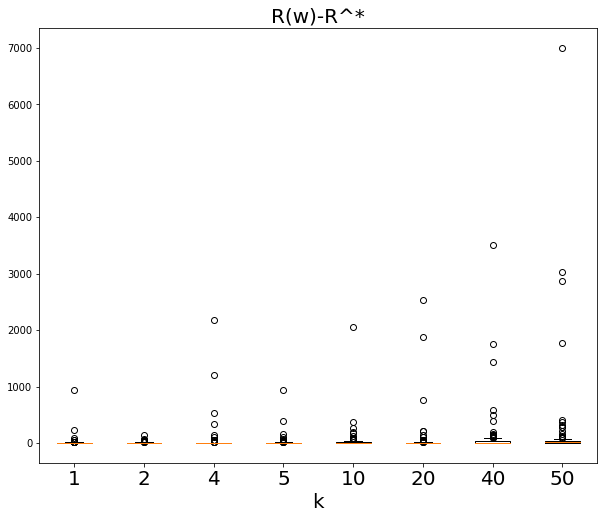

In [17]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [18]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [19]:
df.describe()





,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.979238,6.254191,49.475479,21.844578,42.759927,63.210684,105.941323,183.300152
std,96.544474,17.447427,254.128264,103.336712,210.516043,320.887665,417.728972,822.614585
min,0.000002,0.000215,-0.000275,0.003162,0.001599,-0.000239,-0.000212,0.003048
25%,0.703731,0.252680,0.507253,0.467309,0.421121,0.230752,2.806023,3.561115
50%,2.371621,1.638355,1.513405,1.705387,2.421804,1.624711,8.850010,11.527322
75%,4.847388,3.945480,3.620699,5.075957,20.385480,6.119079,36.209633,33.704448
max,939.520236,144.115664,2177.077614,948.014987,2054.152398,2527.715211,3507.044813,7001.239807
